In [1]:
from datascience import *
import numpy as np

import pandas as pd

In [21]:
games = pd.read_csv('CFB Metric -- Data Art - Sheet1.csv')
massey_rankings = pd.read_csv('CFB Metric -- Data Art - Sheet2.csv')

In [22]:
games.head()

,time,Team1Away,Team2Home,Channel,Team1Score,Team2Score,LastMeaningfulScore
0,• Noon,New Mexico,Wisconsin,Big Ten Network,14,45,37.00
1,• 7:30 p.,Maine,Western Kentucky,ESPN+,31,28,53.25
2,• 6 p.,Youngstown State,West Virginia,No TV channel listed,17,52,29.00
3,• 11 p.,San Jose State,Washington State,Pac-12 Network,0,31,2.00
4,• 5 p.,North Dakota,Washington,Pac-12 Network,3,45,7.00


In [23]:
massey_rankings.head()

,Rank,Team,Conf,Type,Record,Mean,Median,St.Dev,Draft18Picks,AwardWinners18,...,Pts_scored,Off_Yds,Off_YAvg,Total First Dows,DefenseRank,Pts-allowed,Yds_allowed,Avg_allowed,Total First Downs Allowed,Opponent_Tunrovers
0,72,Wyoming,MWC,G5,1-1,72.28,75.0,15.41,1,0,...,20.3,301.3,4.6,17.3,96,29.3,376.7,5.2,21.3,1.0
1,6,Wisconsin,B10,P5,1-0,7.18,6.0,4.17,5,0,...,39.5,529.5,7.5,26.5,12,8.5,258.0,4.4,14.5,2.5
2,92,Western Michigan,MAC,G5,0-1,88.78,90.0,11.82,2,0,...,22.5,414.5,6.0,20.5,129,52.0,505.5,7.1,23.0,0.5
3,109,Western Kentucky,CUSA,G5,0-1,102.57,104.0,11.50,2,0,...,15.5,347.0,5.0,16.0,103,32.5,408.5,5.9,19.0,1.0
4,31,West Virginia,B12,P5,1-0,34.31,34.0,13.90,1,0,...,46.0,586.0,8.6,27.5,31,15.5,297.0,4.8,19.0,0.5


In [26]:
#This gets all the teams that are not in both Massey Ranks and Games
arr = make_array()
for each in games["Team1Away"]:
    if each in massey_rankings["Team"].values:
        pass
    else: 
        arr = np.append(arr, each)
for each in games["Team2Home"]:
    if each in massey_rankings["Team"].values:
        pass
    else: 
        arr = np.append(arr, each)

In [27]:
#Two Arrays for all the rankings of Home and Away Teams
arr1 = make_array()
for each in games["Team1Away"]:
    if each in massey_rankings["Team"].values:
        arr1 = np.append(arr1, float(massey_rankings[massey_rankings["Team"]==each]['Mean']))
    else: 
        arr1 = np.append(arr1, 150)
arr2 = make_array()
for each in games["Team2Home"]:
    if each in massey_rankings["Team"].values:
        arr2 = np.append(arr2, float(massey_rankings[massey_rankings["Team"]==each]['Mean']))
    else: 
        arr2 = np.append(arr2, 150)
        

In [28]:
games['Team1Rank'] = arr1
games['Team2Rank'] = arr2

In [29]:
#Two Arrays for num draft picks of Home and Away Teams
arr1 = make_array()
for each in games["Team1Away"]:
    if each in massey_rankings["Team"].values:
        arr1 = np.append(arr1, int(massey_rankings[massey_rankings["Team"]==each]['Draft18Picks']))
    else: 
        arr1 = np.append(arr1, 0)
arr2 = make_array()
for each in games["Team2Home"]:
    if each in massey_rankings["Team"].values:
        arr2 = np.append(arr2, int(massey_rankings[massey_rankings["Team"]==each]['Draft18Picks']))
    else: 
        arr2 = np.append(arr2, 0)


In [30]:
games['Team1DraftPicks18'] = arr1
games['Team2DraftPicks18'] = arr2

In [44]:
column_maker(massey_rankings,'AwardWinners18')
games.head()

,time,Team1Away,Team2Home,Channel,Team1Score,Team2Score,LastMeaningfulScore,Team1Rank,Team2Rank,Team1DraftPicks18,Team2DraftPicks18,AwardWinners18,Team1AwardWinners18,Team2AwardWinners18
0,• Noon,New Mexico,Wisconsin,Big Ten Network,14,45,37.00,107.12,7.18,1.0,5.0,0.0,0.0,0.0
1,• 7:30 p.,Maine,Western Kentucky,ESPN+,31,28,53.25,150.00,102.57,0.0,2.0,0.0,0.0,0.0
2,• 6 p.,Youngstown State,West Virginia,No TV channel listed,17,52,29.00,150.00,34.31,0.0,1.0,0.0,0.0,0.0
3,• 11 p.,San Jose State,Washington State,Pac-12 Network,0,31,2.00,125.57,32.66,1.0,2.0,0.0,0.0,0.0
4,• 5 p.,North Dakota,Washington,Pac-12 Network,3,45,7.00,150.00,17.44,0.0,5.0,0.0,0.0,0.0


In [45]:
#Defined column maker
def column_maker(tbl_dict, label):
    arr1 = make_array()
    for each in games["Team1Away"]:
        if each in tbl_dict["Team"].values:
            arr1 = np.append(arr1, (tbl_dict[tbl_dict["Team"]==each][label]))
        else: 
            arr1 = np.append(arr1, 0)
    games["Team1_"+label] = arr1
    
    arr2 = make_array()
    for each in games["Team2Home"]:
        if each in tbl_dict["Team"].values:
            arr2 = np.append(arr2, (tbl_dict[tbl_dict["Team"]==each][label]))
        else: 
            arr2 = np.append(arr2, 0)
    games["Team2_"+label] = arr2

In [57]:
column_maker(massey_rankings, "Rank")

In [56]:
col_head = massey_rankings.columns

xArr = make_array()
for each in col_head:
    if each not in games.columns:
        xArr = np.append(xArr, each)

xArr[2:]

array(['Conf', 'Type', 'Record', 'Mean', 'Median', 'St.Dev',
       'Draft18Picks', 'Team.1', 'CoachRank', 'ReturningStarters',
       'wins17', '18Wins', '18Losses', 'Offense_Rk', 'School', 'G',
       'Pts_scored', 'Off_Yds', 'Off_YAvg', 'Total First Dows',
       'DefenseRank', 'Pts-allowed', 'Yds_allowed', 'Avg_allowed',
       'Total First Downs Allowed', 'Opponent_Tunrovers'], dtype='<U32')

In [60]:
for each in xArr[2:]:
    column_maker(massey_rankings, each)

In [61]:
games.head()

,time,Team1Away,Team2Home,Channel,Team1Score,Team2Score,LastMeaningfulScore,Team1Rank,Team2Rank,Team1DraftPicks18,...,Team1_Pts-allowed,Team2_Pts-allowed,Team1_Yds_allowed,Team2_Yds_allowed,Team1_Avg_allowed,Team2_Avg_allowed,Team1_Total First Downs Allowed,Team2_Total First Downs Allowed,Team1_Opponent_Tunrovers,Team2_Opponent_Tunrovers
0,• Noon,New Mexico,Wisconsin,Big Ten Network,14,45,37.00,107.12,7.18,1.0,...,37.5,8.5,567.0,258.0,7.8,4.4,24.0,14.5,2.0,2.5
1,• 7:30 p.,Maine,Western Kentucky,ESPN+,31,28,53.25,150.00,102.57,0.0,...,0.0,32.5,0.0,408.5,0.0,5.9,0.0,19.0,0.0,1.0
2,• 6 p.,Youngstown State,West Virginia,No TV channel listed,17,52,29.00,150.00,34.31,0.0,...,0.0,15.5,0.0,297.0,0.0,4.8,0.0,19.0,0.0,0.5
3,• 11 p.,San Jose State,Washington State,Pac-12 Network,0,31,2.00,125.57,32.66,1.0,...,37.5,9.5,566.5,158.0,6.4,2.8,15.5,7.5,2.0,1.0
4,• 5 p.,North Dakota,Washington,Pac-12 Network,3,45,7.00,150.00,17.44,0.0,...,0.0,12.0,0.0,341.0,0.0,4.6,0.0,18.5,0.0,0.5


In [66]:
gamesDS = Table().from_df(games)
gamesDS.take(np.arange(5))

time,Team1Away,Team2Home,Channel,Team1Score,Team2Score,LastMeaningfulScore,Team1Rank,Team2Rank,Team1DraftPicks18,Team2DraftPicks18,AwardWinners18,Team1AwardWinners18,Team2AwardWinners18,Team1_Rank,Team2_Rank,Team1_Conf,Team2_Conf,Team1_Type,Team2_Type,Team1_Record,Team2_Record,Team1_Mean,Team2_Mean,Team1_Median,Team2_Median,Team1_St.Dev,Team2_St.Dev,Team1_Draft18Picks,Team2_Draft18Picks,Team1_Team.1,Team2_Team.1,Team1_CoachRank,Team2_CoachRank,Team1_ReturningStarters,Team2_ReturningStarters,Team1_wins17,Team2_wins17,Team1_18Wins,Team2_18Wins,Team1_18Losses,Team2_18Losses,Team1_Offense_Rk,Team2_Offense_Rk,Team1_School,Team2_School,Team1_G,Team2_G,Team1_Pts_scored,Team2_Pts_scored,Team1_Off_Yds,Team2_Off_Yds,Team1_Off_YAvg,Team2_Off_YAvg,Team1_Total First Dows,Team2_Total First Dows,Team1_DefenseRank,Team2_DefenseRank,Team1_Pts-allowed,Team2_Pts-allowed,Team1_Yds_allowed,Team2_Yds_allowed,Team1_Avg_allowed,Team2_Avg_allowed,Team1_Total First Downs Allowed,Team2_Total First Downs Allowed,Team1_Opponent_Tunrovers,Team2_Opponent_Tunrovers
• Noon,New Mexico,Wisconsin,Big Ten Network,14,45,37,107.12,7.18,1,5,0,0,0,113,6,MWC,B10,G5,P5,1-0,1-0,107.12,7.18,110,6,11.33,4.17,1,5,New Mexico,Wisconsin,102,14,13,13,3,13,1,1,0,0,46,42,New Mexico,Wisconsin,2,2,38,39.5,445.5,529.5,6.1,7.5,23,26.5,113,12,37.5,8.5,567,258,7.8,4.4,24,14.5,2,2.5
• 7:30 p.,Maine,Western Kentucky,ESPN+,31,28,53.25,150,102.57,0,2,0,0,0,0,109,0,CUSA,0,G5,0,0-1,0,102.57,0,104,0,11.5,0,2,0,Western Kentucky,0,111,0,10,0,6,0,0,0,1,0,122,0,Western Kentucky,0,2,0,15.5,0,347,0,5,0,16,0,103,0,32.5,0,408.5,0,5.9,0,19,0,1
• 6 p.,Youngstown State,West Virginia,No TV channel listed,17,52,29,150,34.31,0,1,0,0,0,0,31,0,B12,0,P5,0,1-0,0,34.31,0,34,0,13.9,0,1,0,West Virginia,0,31,0,12,0,7,0,1,0,0,0,22,0,West Virginia,0,2,0,46,0,586,0,8.6,0,27.5,0,31,0,15.5,0,297,0,4.8,0,19,0,0.5
• 11 p.,San Jose State,Washington State,Pac-12 Network,0,31,2,125.57,32.66,1,2,0,0,0,128,28,MWC,P12,G5,P5,0-1,1-0,125.57,32.66,126,33,2.87,13.96,1,2,San Jose State,Washington State,126,29,14,10,2,9,0,1,1,0,115,54,San Jose State,Washington State,2,2,19,36,308,469,4.3,5.8,13.5,12,114,15,37.5,9.5,566.5,158,6.4,2.8,15.5,7.5,2,1
• 5 p.,North Dakota,Washington,Pac-12 Network,3,45,7,150,17.44,0,5,0,0,0,0,13,0,P12,0,P5,0,0-1,0,17.44,0,11,0,16.95,0,5,0,Washington,0,7,0,17,0,10,0,0,0,1,0,74,0,Washington,0,2,0,30.5,0,515,0,7.2,0,24.5,0,22,0,12,0,341,0,4.6,0,18.5,0,0.5


In [71]:
gamesDS.group('Channel')

channel_rating = make_array()
for each in gamesDS['Channel']: 
    if each in ["ABC", "ABC/ESPN2", "CBS", "ESPN", "ESPN2", "FOX", "NBC"]:
        channel_rating = np.append(channel_rating, 2)
    elif each in ["No TV channel listed"]:
        channel_rating = np.append(channel_rating, 0.25)
    elif each in ["ESPN+", "ESPN3"]:
        channel_rating = np.append(channel_rating, 0.5)    
    else:
        channel_rating = np.append(channel_rating, 1)  
gamesDS = gamesDS.with_column('Channel_Rating', channel_rating)
gamesDS

time,Team1Away,Team2Home,Channel,Team1Score,Team2Score,LastMeaningfulScore,Team1Rank,Team2Rank,Team1DraftPicks18,Team2DraftPicks18,AwardWinners18,Team1AwardWinners18,Team2AwardWinners18,Team1_Rank,Team2_Rank,Team1_Conf,Team2_Conf,Team1_Type,Team2_Type,Team1_Record,Team2_Record,Team1_Mean,Team2_Mean,Team1_Median,Team2_Median,Team1_St.Dev,Team2_St.Dev,Team1_Draft18Picks,Team2_Draft18Picks,Team1_Team.1,Team2_Team.1,Team1_CoachRank,Team2_CoachRank,Team1_ReturningStarters,Team2_ReturningStarters,Team1_wins17,Team2_wins17,Team1_18Wins,Team2_18Wins,Team1_18Losses,Team2_18Losses,Team1_Offense_Rk,Team2_Offense_Rk,Team1_School,Team2_School,Team1_G,Team2_G,Team1_Pts_scored,Team2_Pts_scored,Team1_Off_Yds,Team2_Off_Yds,Team1_Off_YAvg,Team2_Off_YAvg,Team1_Total First Dows,Team2_Total First Dows,Team1_DefenseRank,Team2_DefenseRank,Team1_Pts-allowed,Team2_Pts-allowed,Team1_Yds_allowed,Team2_Yds_allowed,Team1_Avg_allowed,Team2_Avg_allowed,Team1_Total First Downs Allowed,Team2_Total First Downs Allowed,Team1_Opponent_Tunrovers,Team2_Opponent_Tunrovers,Channel_Rating
• Noon,New Mexico,Wisconsin,Big Ten Network,14,45,37,107.12,7.18,1,5,0,0,0,113,6,MWC,B10,G5,P5,1-0,1-0,107.12,7.18,110,6,11.33,4.17,1,5,New Mexico,Wisconsin,102,14,13,13,3,13,1,1,0,0,46,42,New Mexico,Wisconsin,2,2,38,39.5,445.5,529.5,6.1,7.5,23,26.5,113,12,37.5,8.5,567,258,7.8,4.4,24,14.5,2,2.5,1
• 7:30 p.,Maine,Western Kentucky,ESPN+,31,28,53.25,150,102.57,0,2,0,0,0,0,109,0,CUSA,0,G5,0,0-1,0,102.57,0,104,0,11.5,0,2,0,Western Kentucky,0,111,0,10,0,6,0,0,0,1,0,122,0,Western Kentucky,0,2,0,15.5,0,347,0,5,0,16,0,103,0,32.5,0,408.5,0,5.9,0,19,0,1,0.5
• 6 p.,Youngstown State,West Virginia,No TV channel listed,17,52,29,150,34.31,0,1,0,0,0,0,31,0,B12,0,P5,0,1-0,0,34.31,0,34,0,13.9,0,1,0,West Virginia,0,31,0,12,0,7,0,1,0,0,0,22,0,West Virginia,0,2,0,46,0,586,0,8.6,0,27.5,0,31,0,15.5,0,297,0,4.8,0,19,0,0.5,0.25
• 11 p.,San Jose State,Washington State,Pac-12 Network,0,31,2,125.57,32.66,1,2,0,0,0,128,28,MWC,P12,G5,P5,0-1,1-0,125.57,32.66,126,33,2.87,13.96,1,2,San Jose State,Washington State,126,29,14,10,2,9,0,1,1,0,115,54,San Jose State,Washington State,2,2,19,36,308,469,4.3,5.8,13.5,12,114,15,37.5,9.5,566.5,158,6.4,2.8,15.5,7.5,2,1,1
• 5 p.,North Dakota,Washington,Pac-12 Network,3,45,7,150,17.44,0,5,0,0,0,0,13,0,P12,0,P5,0,0-1,0,17.44,0,11,0,16.95,0,5,0,Washington,0,7,0,17,0,10,0,0,0,1,0,74,0,Washington,0,2,0,30.5,0,515,0,7.2,0,24.5,0,22,0,12,0,341,0,4.6,0,18.5,0,0.5,1
• Noon,Towson,Wake Forest,ACC Network,20,51,15.5,150,39.61,0,2,0,0,0,0,36,0,ACC,0,P5,0,1-0,0,39.61,0,39,0,11.5,0,2,0,Wake Forest,0,46,0,14,0,8,0,1,0,0,0,51,0,Wake Forest,0,2,0,37,0,565,0,6.5,0,32,0,49,0,18.5,0,423,0,5.3,0,22.5,0,1,1
• 2 p.,William & Mary,Virginia Tech,ACC Network,17,62,19,150,16.16,0,5,0,0,0,0,12,0,ACC,0,P5,0,1-0,0,16.16,0,14,0,8.36,0,5,0,Virginia Tech,0,24,0,12,0,9,0,1,0,0,0,28,0,Virginia Tech,0,2,0,43,0,452.5,0,6.9,0,23.5,0,18,0,10,0,296.5,0,4.9,0,12,0,3.5,1
• Noon,Nevada,Vanderbilt,SEC Network,10,41,17.5,87.6,66.74,1,1,0,0,0,89,64,MWC,SEC,G5,P5,1-0,1-0,87.6,66.74,88,66,12.35,13.99,1,1,Nevada,Vanderbilt,121,60,14,12,3,5,1,1,0,0,37,49,Nevada,Vanderbilt,2,2,41,38,443,407.5,7,6.4,20,22,98,11,30,8.5,408,272,5.4,4,21,18,1.5,3,1
• 7 p.,Baylor,UTSA,No TV channel listed,37,20,41,76.65,107.97,0,1,0,0,0,79,114,B12,CUSA,P5,G5,1-0,0-1,76.65,107.97,75,112,23.71,13.56,0,1,Baylor,UTSA,64,103,17,10,1,6,1,0,0,1,21,126,Baylor,UTSA,2,2,46,13.5,550,238,8.1,3.5,26,17,67,123,23.5,43,360.5,499,5.7,7.6,17.5,23.5,1,0.5,0.25
• 8 p.,New Mexico State,Utah State,No TV channel listed,13,60,14.25,115.72,80.24,1,0,0,0,0,119,83,FBSI,MWC,G5,G5,0-2,0-1,115.72,80.24,119,78,11.38,15.49,1,0,New Mexico State,Utah State,104,99,15,18,7,6,0,0,2,1,128,24,New Mexico State,Utah State,3,2,10,45.5,228.7,396,3.3,5.5,15.3,24.5,126,80,45.7,25.5,475,366,6.1,4.7,23,21.5,1,3.5,0.25


In [115]:
#Game Importance

#Average Game Number 
game_numarr = make_array()
for each in np.arange(gamesDS.num_rows):
    a = gamesDS.take(each)["Team1_18Wins"][0]
    b = gamesDS.take(each)["Team2_18Wins"][0]
    c = gamesDS.take(each)["Team1_18Losses"][0]
    d = gamesDS.take(each)["Team1_18Losses"][0]
    game_numarr = np.append(game_numarr, ((a+b+c+d)/2))
gamesDS = gamesDS.with_column("GameNumber",game_numarr)

#Transformed Massey Ranks

OldRange = ((1/4) - (1/150)) #Inv Alabama - Inv FCS  
NewRange = (1000) #Ideal Range  
t1arr = make_array()
for each in gamesDS["Team1_Mean"]:
    if each == 0:
        OldValue = (1/150)
    else:
        OldValue = (1/each)
    NewValue = (((OldValue - 1/150) * NewRange) / OldRange)
    t1arr = np.append(t1arr, NewValue)

t2arr = make_array()
for each in gamesDS["Team2_Mean"]:
    if each == 0:
        OldValue = (1/150)
    else:
        OldValue = (1/each)
    NewValue = (((OldValue - 1/150) * NewRange) / OldRange)
    
    t2arr = np.append(t2arr, NewValue)

gamesDS = gamesDS.with_columns("adjusted_Team1Rank",t1arr,"adjusted_Team2Rank",t2arr)

#Average Impact of a Loss
#avg ELO Change after loss for both teams

ELOarr = make_array()
for each in np.arange(gamesDS.num_rows):
    ans = (1/2)*((gamesDS.take(each)["adjusted_Team1Rank"][0] + (32*(\
     (10**(gamesDS.take(each)["adjusted_Team1Rank"][0]/50))/\
        ((10**(gamesDS.take(each)["adjusted_Team1Rank"][0]/50))+\
        (10**(gamesDS.take(each)["adjusted_Team2Rank"][0]/50))))))+\
    #t1 loses is above, t2 loses is below
    (gamesDS.take(each)["adjusted_Team2Rank"][0] + (32*(\
     (10**(gamesDS.take(each)["adjusted_Team2Rank"][0]/50))/\
        ((10**(gamesDS.take(each)["adjusted_Team1Rank"][0]/50))+\
        (10**(gamesDS.take(each)["adjusted_Team2Rank"][0]/50)))))))
    ELOarr = np.append(ELOarr, ans)

gamesDS = gamesDS.with_column('LossImpact',ELOarr)

# Playoff Impact
from scipy import stats

pIarr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1rank = gamesDS.take(each)["Team1_Mean"][0]
    adjrank = (1/t1rank)*150
    t2rank = gamesDS.take(each)["Team2_Mean"][0]
    adjrank2 = (1/t2rank)*150
    pIarr = np.append(pIarr, stats.hmean([adjrank , adjrank2]))
gamesDS = gamesDS.with_column('PlayoffImpact', pIarr)

# Game Importance
game_importance = ((gamesDS["GameNumber"]+1)/9)*(gamesDS["LossImpact"])*(gamesDS["PlayoffImpact"])
gamesDS = gamesDS.with_column('game_importance',game_importance)
game_importance


/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in double_scalars


array([ 171.45989791,    7.25828362,   90.63021754,   35.7502739 ,
        229.59127789,   68.38805916,  400.53990141,   18.50777467,
          9.32764509,   16.31325452,    7.14064697,  267.34145035,
          9.33600059,   13.14206471,   15.37752315,    4.92381863,
         19.08641041,    9.72062424,   10.75110875,   28.05556189,
        513.58857011,   11.32390032,   59.81880543,  588.68022156,
         49.07365701,    7.47388451,   16.64486183,  238.33723991,
          6.54117022,   81.57962629,    7.93522836,   69.18401065,
        498.60469028,  377.49395787,  104.55550101,  148.39652419,
         33.94466141,   22.7110727 ,   20.57397685,   36.10959752,
         34.55035307,   55.40937672,   67.25347381,   48.89314057,
          8.13406994,   49.12172648,    8.95161855,   77.08566671,
         25.44826711,  497.27099812,   35.838779  ,   21.11653135,
          5.10640583,  138.86921211,  114.06440813,   27.81829209,
         11.80298636,   37.14609644,   15.51959525,   14.91974

In [158]:
# Team Quality

# Coach Ranking
CRarr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1CR = gamesDS.take(each)["Team1_CoachRank"]
    t2CR = gamesDS.take(each)["Team2_CoachRank"]
    if t1CR == 0:
        t1CR = (1/150)*150
    else:
        t1CR = (1/t1CR)*150
    if t2CR == 0:
        t2CR = (1/150)*150
    else:
        t2CR = (1/t2CR)*150
    CRarr = np.append(CRarr, (t1CR+t2CR))
    
# Number of Returning Starters
rsarr = make_array()
for each in np.arange(gamesDS.num_rows):
    rs1 = gamesDS.take(each)["Team1_ReturningStarters"][0]
    rs2 = gamesDS.take(each)["Team2_ReturningStarters"][0]
    rsarr = np.append(rsarr, (rs1 + rs2))
    

# Prior Season Wins
twarr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1w = gamesDS.take(each)["Team1_wins17"][0]
    t2w = gamesDS.take(each)["Team2_wins17"][0]
    twarr = np.append(twarr, ((t1w + t2w)/2))
    
# Number of Draft Picks Prior Season
nfldarr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1draft = gamesDS.take(each)["Team1DraftPicks18"][0]
    t2draft = gamesDS.take(each)["Team2DraftPicks18"][0]
    nfldarr = np.append(nfldarr, (t1draft + t2draft))

# Number of Award Winners Prior Season
awdarr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1awards = gamesDS.take(each)["Team1AwardWinners18"][0]
    t2awards = gamesDS.take(each)["Team2AwardWinners18"][0]
    awdarr = np.append(awdarr, (t1awards + t2awards))
    
#Harmonic Mean of Rankings
tQarr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1rank = gamesDS.take(each)["Team1Rank"][0]
    adjrank = (1/t1rank)*150
    t2rank = gamesDS.take(each)["Team2Rank"][0]
    adjrank2 = (1/t2rank)*150
    tQarr = np.append(tQarr, stats.hmean([adjrank , adjrank2]))
    
#Offense rank
Oarr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1O = gamesDS.take(each)["Team1_Offense_Rk"]
    t2O = gamesDS.take(each)["Team2_Offense_Rk"]
    if t1O == 0:
        t1O = (1/150)*150
    else:
        t1O = (1/t1O)*150
    if t2O == 0:
        t2O = (1/150)*150
    else:
        t2O = (1/t2O)*150
    Oarr = np.append(Oarr, (t1O+t2O))
    
#Defense rank
Darr = make_array()
for each in np.arange(gamesDS.num_rows):
    t1D = gamesDS.take(each)["Team1_DefenseRank"]
    t2D = gamesDS.take(each)["Team2_DefenseRank"]
    if t1D == 0:
        t1D = (1/150)*150
    else:
        t1D = (1/t1D)*150
    if t2D == 0:
        t2D = (1/150)*150
    else:
        t2D = (1/t2D)*150
    Darr = np.append(Darr, (t1D+t2D))

#General Array Adder
def add_cols(c1, c2):
    tarr = make_array()
    for each3 in np.arange(gamesDS.num_rows):
        t1 = gamesDS[c1][each3]
        t2 = gamesDS[c2][each3]
        tarr = np.append(tarr, (t1+t2))
    return (tarr)

Opts = add_cols("Team1_Pts_scored","Team2_Pts_scored")
Offavg = add_cols("Team1_Off_YAvg","Team2_Off_YAvg")
OFD = add_cols("Team1_Total First Dows","Team2_Total First Dows")
DPA = add_cols("Team1_Pts-allowed","Team2_Pts-allowed")
DYA = add_cols("Team1_Avg_allowed","Team2_Avg_allowed")
DFDA = add_cols("Team1_Total First Downs Allowed","Team2_Total First Downs Allowed")
DTO = add_cols("Team1_Opponent_Tunrovers","Team2_Opponent_Tunrovers")

# Division Multiplier
t1type = make_array()
for each in gamesDS["Team1_Type"]:
    if each == 0:
        t1type = np.append(t1type, .5)
    elif each == "P5":
        t1type = np.append(t1type, 2)
    else:
        t1type = np.append(t1type, 1)
t2type = make_array()
for each in gamesDS["Team2_Type"]:
    if each == 0:
        t2type = np.append(t2type, .5)
    elif each == "P5":
        t2type = np.append(t2type, 2)
    else:
        t2type = np.append(t2type, 1)
typearr = t1type*t2type

#Team Quality

TeamQuality = make_array()
for each in np.arange(gamesDS.num_rows):
    each = int(each)
    tq = typearr[each] * ((twarr[each]+nfldarr[each]+awdarr[each])/3)\
        *((CRarr[each])+((rsarr[each])*6)+((tQarr[each])*2)+\
        ((Oarr[each])*0.5)+((Darr[each])*0.5)+(Opts[each] - DPA[each])\
        +(Offavg[each] - DYA[each]) + (OFD[each] - DFDA[each]) + DTO[each])
    TeamQuality = np.append(TeamQuality, tq)

gamesDS = gamesDS.with_column('TeamQuality',TeamQuality)
TeamQuality

array([2166.86478086,   78.61639973,  393.66762112,  998.77151039,
       1073.56366   ,  502.50584044,  891.13936462,  907.07327077,
        509.23741554,  478.4074604 ,  164.94212736,  561.74824782,
        149.33097666,  187.70820667,  530.12869536,   29.07469253,
       1268.9534217 ,  335.81268438,  531.17507543,  286.80594606,
       7207.08354697,  641.72835739, 1365.55718447, 7220.12247364,
       2024.7035045 ,  217.53095878,  895.63384941, 4670.96100687,
         26.17735938,  617.9296315 ,  337.01816381, 1817.54827633,
       6327.94077675, 7706.36572791, 1614.78783758, 2753.78713513,
       1350.16805149,  260.5366843 , 1627.46504336, 1682.39528153,
        677.53128174, 1606.46723059,  698.28447655, 1316.56177322,
        162.14849681, 1445.05985099,  348.33600616, 1205.03313701,
        181.02205515,  313.55720018,  549.87151533,  204.1183231 ,
         38.07146842, 4647.34258768, 3826.17339565, 2656.27377529,
         80.89233977, 1091.9165317 ,  139.92009511,  245.97567

In [159]:
#Game Quality 

#Closeness
closeness = (1/(1+abs(gamesDS["Team1Score"]-gamesDS["Team2Score"])))*100

#Decisive Score (When the winning team scored more points than the losing team accrued )
last_score = gamesDS["LastMeaningfulScore"]*100

#Upset
upset_arr = make_array()
for each in np.arange(gamesDS.num_rows):
    #Winning Upset on Road
    if gamesDS.take(each)["Team1Score"][0] > gamesDS.take(each)["Team2Score"][0]:
        if gamesDS.take(each)["Team1Rank"][0] > gamesDS.take(each)["Team2Rank"][0]:
             upset_arr = np.append(upset_arr, 2.5)
        #Road Win, No Upset
        else: 
            upset_arr = np.append(upset_arr, 1.5)
        
    #Winning Upset at Home
    elif gamesDS.take(each)["Team1Score"][0] < gamesDS.take(each)["Team2Score"][0]:
        if gamesDS.take(each)["Team1Rank"][0] < gamesDS.take(each)["Team2Rank"][0]:
             upset_arr = np.append(upset_arr, 1.75)
        #Normal Home Win
        else:
            upset_arr = np.append(upset_arr, 1)
    else:
        upset_arr = np.append(upset_arr, 1)

#TV Channel
channels = gamesDS["Channel_Rating"]

#Game Quality
game_quality = (channels*upset_arr)*(closeness)*(last_score)

gamesDS = gamesDS.with_column('game_quality',game_quality)
game_quality

array([1.15625000e+04, 1.66406250e+05, 2.01388889e+03, 6.25000000e+02,
       1.62790698e+03, 4.84375000e+03, 4.13043478e+03, 5.46875000e+03,
       8.54166667e+03, 7.42187500e+02, 1.83189655e+03, 4.48717949e+02,
       4.03846154e+03, 1.13207547e+03, 1.28205128e+02, 1.08088235e+04,
       6.68750000e+04, 2.10526316e+03, 9.21875000e+04, 9.43396226e+02,
       6.00000000e+03, 1.90625000e+05, 1.59687500e+05, 3.60000000e+04,
       2.12903226e+04, 9.29166667e+03, 7.50000000e+05, 1.95652174e+03,
       8.95833333e+03, 4.28571429e+03, 1.56250000e+04, 6.25000000e+02,
       2.58620690e+04, 8.00000000e+02, 7.66666667e+04, 3.45833333e+04,
       4.53125000e+04, 1.80232558e+03, 2.93750000e+05, 3.28571429e+03,
       5.03125000e+05, 1.05357143e+04, 9.30555556e+03, 1.23593750e+05,
       7.65000000e+03, 1.48936170e+03, 3.23863636e+03, 1.41025641e+03,
       5.95588235e+03, 4.84375000e+03, 1.66000000e+04, 1.25000000e+03,
       1.18902439e+03, 3.68181818e+04, 6.95454545e+04, 5.60000000e+04,
      

In [163]:
gamesDS = gamesDS.with_column('GameGoodness',(game_importance+game_quality+TeamQuality)/1000)

time,Team1Away,Team2Home,Channel,Team1Score,Team2Score,LastMeaningfulScore,Team1Rank,Team2Rank,Team1DraftPicks18,Team2DraftPicks18,AwardWinners18,Team1AwardWinners18,Team2AwardWinners18,Team1_Rank,Team2_Rank,Team1_Conf,Team2_Conf,Team1_Type,Team2_Type,Team1_Record,Team2_Record,Team1_Mean,Team2_Mean,Team1_Median,Team2_Median,Team1_St.Dev,Team2_St.Dev,Team1_Draft18Picks,Team2_Draft18Picks,Team1_Team.1,Team2_Team.1,Team1_CoachRank,Team2_CoachRank,Team1_ReturningStarters,Team2_ReturningStarters,Team1_wins17,Team2_wins17,Team1_18Wins,Team2_18Wins,Team1_18Losses,Team2_18Losses,Team1_Offense_Rk,Team2_Offense_Rk,Team1_School,Team2_School,Team1_G,Team2_G,Team1_Pts_scored,Team2_Pts_scored,Team1_Off_Yds,Team2_Off_Yds,Team1_Off_YAvg,Team2_Off_YAvg,Team1_Total First Dows,Team2_Total First Dows,Team1_DefenseRank,Team2_DefenseRank,Team1_Pts-allowed,Team2_Pts-allowed,Team1_Yds_allowed,Team2_Yds_allowed,Team1_Avg_allowed,Team2_Avg_allowed,Team1_Total First Downs Allowed,Team2_Total First Downs Allowed,Team1_Opponent_Tunrovers,Team2_Opponent_Tunrovers,Channel_Rating,GameNumber,adjusted_Team1Rank,adjusted_Team2Rank,LossImpact,PlayoffImpact,game_importance,TeamQuality,game_quality,GameGoodness
• Noon,Eastern Michigan,Purdue,Big Ten Network,20,19,60,88.2,56.6,0,1,0,0,0,91,54,MAC,B10,G5,P5,1-0,0-1,88.2,56.6,90,51,11.82,19.65,0,1,Eastern Michigan,Purdue,106,37,13,13,5,7,1,0,0,1,55,98,Eastern Michigan,Purdue,2,2,35.5,23,444.5,474,6.8,6.9,23,21,46,79,18,25.5,431,408.5,5.9,5.7,21,20.5,1.5,0.5,1,0.5,19.1967,45.2103,48.2035,2.07182,16.6449,895.634,750000,750.912
• 10:45 p.,Michigan State,Arizona State,ESPN,13,16,60,20.65,41.39,1,3,0,0,0,20,39,B10,P12,P5,P5,1-0,1-0,20.65,41.39,17,41,11.44,11.04,1,3,Michigan State,Arizona State,9,87,19,12,10,7,1,1,0,0,91,65,Michigan State,Arizona State,2,2,25.5,32.5,415.5,470.5,6,7.1,23,23,69,16,23.5,10,390.5,300,5.5,4.3,25,20.5,1.5,2,2,1,171.614,71.8922,137.753,4.83559,148.026,4226.91,525000,529.375
• 3:30 p.,Memphis,Navy,CBSSN,21,22,57.5,32.38,80.09,2,0,0,0,0,27,82,AAC,AAC,G5,G5,1-0,0-1,32.38,80.09,33,79,10.78,16.62,2,0,Memphis,Navy,56,45,15,9,10,7,1,0,0,1,26,71,Memphis,Navy,2,2,43.5,31.5,565,363.5,8.4,5.2,23,19.5,48,119,18,40,245,452,3.8,7.7,14,19.5,1.5,2.5,1,0.5,99.5203,23.9149,77.7176,2.66738,34.5504,677.531,503125,503.837
• 3:30 p.,Clemson,Texas A&M,ABC,28,26,44,5.25,35.29,3,3,0,1,0,4,32,ACC,SEC,P5,P5,1-0,1-0,5.25,35.29,4,34,5.24,10.49,3,3,Clemson,Texas A&M,2,4,15,16,12,7,1,1,0,0,45,29,Clemson,Texas A&M,2,2,38,42.5,482,629.5,7.7,7.5,18.5,32.5,33,45,16.5,17.5,374,336,5.6,6.4,19,13.5,2,0,2,1,755.382,89.0547,438.218,7.4001,720.635,8617.23,440000,449.338
• 10:15 p.,California,BYU,ESPN2,21,18,45.75,52.97,70.84,2,1,0,0,0,50,71,P12,FBSI,P5,G5,1-0,1-0,52.97,70.84,52,71,14.54,18.78,2,1,California,BYU,68,85,18,14,5,4,1,1,0,0,101,96,California,Brigham Young,2,2,22.5,23,339,343,4.4,4.8,21,20.5,43,60,17.5,22,297.5,362.5,4.1,5.1,17,22.5,3.5,1.5,2,1,50.1861,30.615,56.4005,2.42307,30.3694,1091.67,343125,344.247
• 3:30 p.,Colorado,Nebraska,ABC,33,28,58.75,61.01,67.32,1,1,0,0,0,59,65,P12,B10,P5,P5,1-0,0-0,61.01,67.32,62,60,15.42,20.68,1,1,Colorado,Nebraska,49,28,10,15,5,4,1,0,0,0,43,84,Colorado,Nebraska,2,1,39,28,495.5,565,6.6,6.8,24.5,25,56,105,20.5,33,424.5,395,5.3,4.6,22.5,26,2,0,2,0.5,39.962,33.6483,52.8052,2.33772,20.574,1627.47,293750,295.398
• 7 p.,UL Monroe,Southern Mississippi,ESPN3,21,20,30.5,105.18,85.02,0,3,0,0,0,111,87,SBC,CUSA,G5,G5,1-0,1-0,105.18,85.02,107.5,91,10.39,19.13,0,3,UL Monroe,Southern Mississippi,115,91,17,9,4,8,1,1,0,0,87,50,UL Monroe,Southern Mississippi,2,2,27.5,37.5,455,446.5,5.9,5.7,22.5,27.5,78,28,25.5,14,436.5,277.5,6,4.8,24,12,2.5,3,0.5,1,11.6747,20.9395,32.3071,1.57729,11.3239,641.728,190625,191.278
• 7:30 p.,Maine,Western Kentucky,ESPN+,31,28,53.25,150,102.57,0,2,0,0,0,0,109,0,CUSA,0,G5,0,0-1,0,102.57,0,104,0,11.5,0,2,0,Western Kentucky,0,111,0,10,0,6,0,0,0,1,0,122,0,Western Kentucky,0,2,0,15.5,0,347,0,5,0,16,0,103,0,32.5,0,408.5,0,5.9,0,19,0,1,0.5,0,0,12.6689,22.3345,2.92483,7.25828,78.6164,166406,

In [165]:
gamesDS.sort("GameGoodness", descending=False)

time,Team1Away,Team2Home,Channel,Team1Score,Team2Score,LastMeaningfulScore,Team1Rank,Team2Rank,Team1DraftPicks18,Team2DraftPicks18,AwardWinners18,Team1AwardWinners18,Team2AwardWinners18,Team1_Rank,Team2_Rank,Team1_Conf,Team2_Conf,Team1_Type,Team2_Type,Team1_Record,Team2_Record,Team1_Mean,Team2_Mean,Team1_Median,Team2_Median,Team1_St.Dev,Team2_St.Dev,Team1_Draft18Picks,Team2_Draft18Picks,Team1_Team.1,Team2_Team.1,Team1_CoachRank,Team2_CoachRank,Team1_ReturningStarters,Team2_ReturningStarters,Team1_wins17,Team2_wins17,Team1_18Wins,Team2_18Wins,Team1_18Losses,Team2_18Losses,Team1_Offense_Rk,Team2_Offense_Rk,Team1_School,Team2_School,Team1_G,Team2_G,Team1_Pts_scored,Team2_Pts_scored,Team1_Off_Yds,Team2_Off_Yds,Team1_Off_YAvg,Team2_Off_YAvg,Team1_Total First Dows,Team2_Total First Dows,Team1_DefenseRank,Team2_DefenseRank,Team1_Pts-allowed,Team2_Pts-allowed,Team1_Yds_allowed,Team2_Yds_allowed,Team1_Avg_allowed,Team2_Avg_allowed,Team1_Total First Downs Allowed,Team2_Total First Downs Allowed,Team1_Opponent_Tunrovers,Team2_Opponent_Tunrovers,Channel_Rating,GameNumber,adjusted_Team1Rank,adjusted_Team2Rank,LossImpact,PlayoffImpact,game_importance,TeamQuality,game_quality,GameGoodness
• 4 p.,Lamar,Texas Tech,No TV channel listed,0,77,4,150,69.28,0,2,0,0,0,0,66,0,B12,0,P5,0,0-1,0,69.28,0,65,0,17.46,0,2,0,Texas Tech,0,63,0,16,0,6,0,0,0,1,0,12,0,Texas Tech,0,2,0,52,0,580.5,0,6.5,0,34,0,70,0,23.5,0,364,0,5.4,0,17.5,0,2.5,0.25,0,0,31.9213,31.9606,4.33025,15.3775,530.129,128.205,0.673711
• 3:30 p.,Howard,Kent State,ESPN+,14,54,9.75,150,123.57,0,0,0,0,0,0,127,0,MAC,0,G5,0,0-1,0,123.57,0,125,0,3.73,0,0,0,Kent State,0,129,0,13,0,2,0,0,0,1,0,44,0,Kent State,0,2,0,39,0,483.5,0,5.9,0,27,0,65,0,22.5,0,372,0,4.9,0,19.5,0,3,0.5,0,0,5.85991,18.93,2.42777,5.10641,38.0715,1189.02,1.2322
• 8 p.,New Mexico State,Utah State,No TV channel listed,13,60,14.25,115.72,80.24,1,0,0,0,0,119,83,FBSI,MWC,G5,G5,0-2,0-1,115.72,80.24,119,78,11.38,15.49,1,0,New Mexico State,Utah State,104,99,15,18,7,6,0,0,2,1,128,24,New Mexico State,Utah State,3,2,10,45.5,228.7,396,3.3,5.5,15.3,24.5,126,80,45.7,25.5,475,366,6.1,4.7,23,21.5,1,3.5,0.25,2,8.11595,23.819,31.9675,1.53092,16.3133,478.407,742.187,1.23691
• 3:30 p.,Wagner,Syracuse,ACC Network,10,62,5,150,62.6,0,1,0,0,0,0,61,0,ACC,0,P5,0,1-0,0,62.6,0,61,0,14.71,0,1,0,Syracuse,0,81,0,14,0,4,0,1,0,0,0,7,0,Syracuse,0,2,0,58.5,0,510,0,6,0,26,0,82,0,26,0,463,0,6.9,0,19,0,2.5,1,0.5,0,38.2511,35.1256,4.79233,28.0556,286.806,943.396,1.25826
• 6 p.,South Carolina State,UCF,ESPN3,0,38,3.5,150,19.82,0,4,1,0,1,0,16,0,AAC,0,G5,0,1-0,0,19.82,0,19,0,12.73,0,4,0,UCF,0,96,0,12,0,13,0,1,0,0,0,19,0,UCF,0,2,0,47,0,612.5,0,7.7,0,32,0,10,0,8.5,0,372,0,4.7,0,20.5,0,3,0.5,0.5,0,179.948,105.974,15.1362,267.341,561.748,448.718,1.27781
• 7 p.,Florida A&M,Troy,ESPN+,7,59,12,150,75.17,0,0,0,0,0,0,77,0,SBC,0,G5,0,0-1,0,75.17,0,77,0,23.65,0,0,0,Troy,0,59,0,12,0,11,0,0,0,1,0,41,0,Troy,0,2,0,39.5,0,428,0,5.5,0,25.5,0,100,0,31.5,0,351.5,0,5.9,0,15,0,2.5,0.5,0,0,27.2733,29.6367,3.99095,13.1421,187.708,1132.08,1.33293
• 7 p.,Southern,Louisiana Tech,ESPN+,17,54,9.5,150,72.53,0,1,0,0,0,0,73,0,CUSA,0,G5,0,1-0,0,72.53,0,74,0,12.81,0,1,0,Louisiana Tech,0,78,0,15,0,7,0,1,0,0,0,32,0,Louisiana Tech,0,2,0,42,0,534.5,0,6.9,0,27,0,57,0,21.5,0,299.5,0,4.6,0,16.5,0,2.5,0.5,0.5,0,29.2633,30.6316,4.13622,21.1165,204.118,1250,1.47523
• 3:30 p.,Morgan State,Akron,ESPN+,7,41,9,150,96.95,0,0,0,0,0,0,100,0,MAC,0,G5,0,0-0,0,96.95,0,100,0,16.98,0,0,0,Akron,0,82,0,14,0,7,0,0,0,0,0,35,0,Akron,0,1,0,41,0,437,0,6.2,0,25,0,4,0,7,0,193,0,3.1,0,14,0,3,0.5,0,0,14.9915,23.4957,3.09438,8.0783,189.294,1285.71,1.48309
• 11 p.,San Jose State,Washington State,Pac-12 Network,0,31,2,125.57,32.66,1,2,0,0,0,128,28,MWC,P12,G5,P5,0-1,1-0,125.57,32.66,126,33,2.87,13.96,1,2,San Jose State,Washington State,126,29,14,10,2,9,0,1,1,0,115,54,San Jose State,Washington State,2,2,19,36,308,469,4.3,5.8,13.5,12,114,15,37.5,9.5,566.5,158,6.4,2.8,15.5,7.5,2,1,1,1.5,5.33021,98.4322,67.8812,1.89597,35.7503,998.772,625,1.65

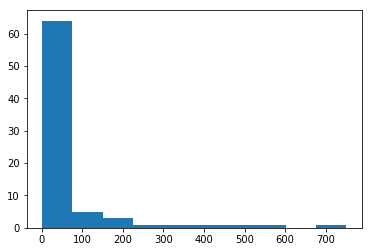

In [186]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.hist(gamesDS["GameGoodness"])
plt.show()

In [189]:
gamesDS.select('Team1Away','Team2Home', 'Team1Score','Team2Score','game_importance','TeamQuality','game_quality','GameGoodness').sort('GameGoodness', descending=False)

Team1Away,Team2Home,Team1Score,Team2Score,game_importance,TeamQuality,game_quality,GameGoodness
Lamar,Texas Tech,0,77,15.3775,530.129,128.205,0.673711
Howard,Kent State,14,54,5.10641,38.0715,1189.02,1.2322
New Mexico State,Utah State,13,60,16.3133,478.407,742.187,1.23691
Wagner,Syracuse,10,62,28.0556,286.806,943.396,1.25826
South Carolina State,UCF,0,38,267.341,561.748,448.718,1.27781
Florida A&M,Troy,7,59,13.1421,187.708,1132.08,1.33293
Southern,Louisiana Tech,17,54,21.1165,204.118,1250,1.47523
Morgan State,Akron,7,41,8.0783,189.294,1285.71,1.48309
San Jose State,Washington State,0,31,35.7503,998.772,625,1.65952
UConn,Boise State,7,62,66.0608,581.305,1339.29,1.98665
